Compare the results of the following algorithms on theses three new classes from the CIFAR10 dataset (Automobile, Cat, Dog):

* Nearest Neighbors (kNN)
* Decision Trees
* Random Forests
* Neural Networks (MLP)
* Support Vector Machines

You can get the new data from [this link](https://u.pcloud.link/publink/show?code=XZTtuOkZPuVe4TSCBufR8IGeBSNYu0DjBRk7). The following code reads the data (make sure you get it from the right directory!) & display a few images.

Pre-loading training data
Pre-loading test data


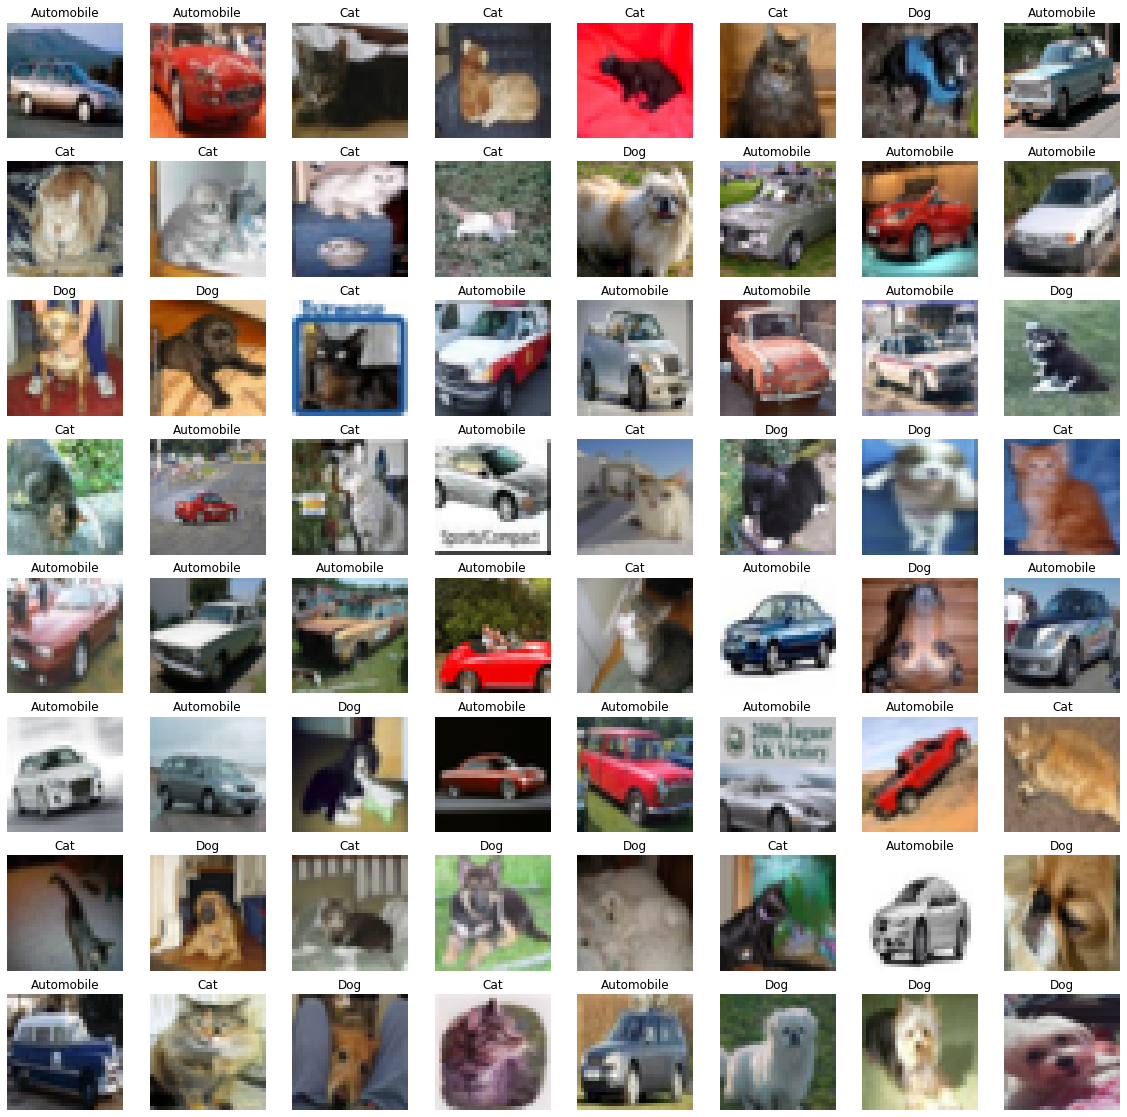

In [ ]:
from lab_tools import CIFAR10, get_hog_image

dataset = CIFAR10('/home/christos/Documents/MS BDGA/Python - SFML/info-h-500-501-master/LABS1/CIFAR10_v2')
dataset.labels = ['Automobile', 'Cat', 'Dog']
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,20))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(dataset.train['images'][i].reshape((32,32,3)), interpolation='none')
    plt.title(dataset.labels[dataset.train['labels'][i]])
    plt.axis('off')
plt.show()

HoG images:

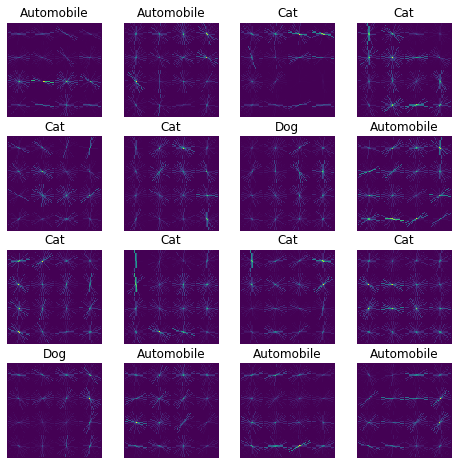

In [ ]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    hog = dataset.train['hog'][i].reshape((4,4,16))
    plt.imshow(get_hog_image(hog, 128), interpolation='none')
    plt.title(dataset.labels[dataset.train['labels'][i]])
    plt.axis('off')
plt.show()

## Exploring the dataset


In [ ]:
print(dataset.path)
print(dataset.labels)
print(dataset.train.keys())
print(dataset.train['hog'].shape)

/home/christos/Documents/MS BDGA/Python - SFML/info-h-500-501-master/LABS1/CIFAR10_v2
['Automobile', 'Cat', 'Dog']
dict_keys(['images', 'hog', 'labels'])
(15000, 256)


In [ ]:
print(dataset.train['images'].shape)
print(dataset.test['images'].shape)
print(dataset.labels)

for i in range(3):
    print(dataset.labels[i],(dataset.test['labels']==i).sum())

for i in range(3):
    print(dataset.labels[i],(dataset.train['labels']==i).sum())

(15000, 3072)
(3000, 3072)
['Automobile', 'Cat', 'Dog']
Automobile 0
Cat 1000
Dog 0
Automobile 5000
Cat 5000
Dog 5000


* How many images are in the training set ?
* How many images are in the test set ?
* What is the class distribution of the dataset ?

As we can see, we have 15000 images in the training set and 3000 images in the test set.
We have an uneven class distribution in the test set skewed towards the "Cat" class, that will have to be fixed.

## Descriptive data analysis

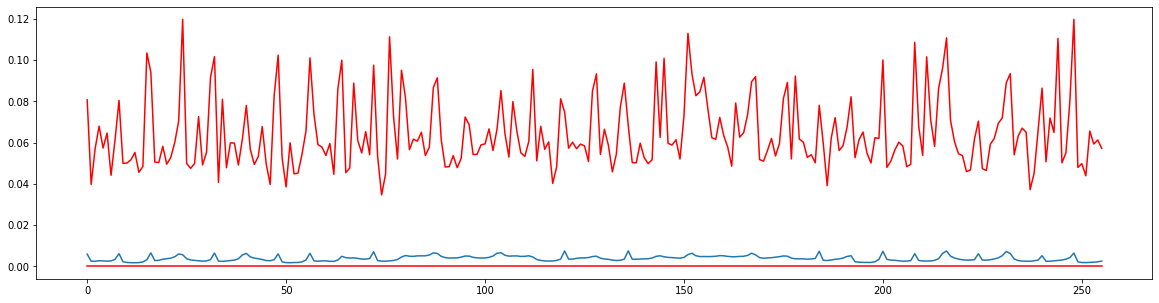

In [ ]:
dataset.train['hog'].mean(axis=0)

plt.figure(figsize=(20,5))
plt.plot(dataset.train['hog'].mean(axis=0))
plt.plot(dataset.train['hog'].min(axis=0), 'r-')
plt.plot(dataset.train['hog'].max(axis=0), 'r-')
plt.show()

<h1>1. Nearest Neighbors </h1>

Nearest Neighbor algorithm on the Histogram of Gradient decriptors in the dataset

We start our performance analysis by applying the K-Nearest Neighbors. This algorithm works by finding the majority vote for the target value, based on the K-nearest datapoints around our datapoint of interest.

Process:
1. Pick a value for K

2. Calculate the distance of the unknown case from all cases, ie calculate similarity
  between two datapoints
  
3. Select the K observations in the data that are the nearest to the
  datapoint in question
  
4. Estimate the distribution parameters using Maximum Likelihood
  
4. Predict the response of the unknown data point using the most popular
  response value from the K-nearest neighboors

We select a range of neighbors from 1 till 21 and compare their performance between the training and the test sets

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

X_train=dataset.train['hog'][:4000]
y_train=dataset.train['labels'][:4000]

X_test=dataset.train['hog'][4000:]
y_test=dataset.train['labels'][4000:]

neighbors = np.arange(1, 21)
predictionk = list()

print('### K-NEAREST NEIGHBORS RESULTS###')

for n in neighbors:
    knn= KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    yhat = knn.predict(X_test)
    predictionk.append(yhat)
    print('Accuracy for k=',n,':', accuracy_score(y_train, knn.predict(X_train)),'(Train set), ', accuracy_score(y_test, yhat),'(Test set)')

### K-NEAREST NEIGHBORS RESULTS###
Accuracy for k= 1 : 1.0 (Train set),  0.628 (Test set)
Accuracy for k= 2 : 0.7845 (Train set),  0.6088181818181818 (Test set)
Accuracy for k= 3 : 0.79625 (Train set),  0.6355454545454545 (Test set)
Accuracy for k= 4 : 0.76575 (Train set),  0.6415454545454545 (Test set)
Accuracy for k= 5 : 0.765 (Train set),  0.6491818181818182 (Test set)
Accuracy for k= 6 : 0.7415 (Train set),  0.6461818181818182 (Test set)
Accuracy for k= 7 : 0.7525 (Train set),  0.6590909090909091 (Test set)
Accuracy for k= 8 : 0.73425 (Train set),  0.6556363636363637 (Test set)
Accuracy for k= 9 : 0.74225 (Train set),  0.6574545454545454 (Test set)
Accuracy for k= 10 : 0.73075 (Train set),  0.6582727272727272 (Test set)
Accuracy for k= 11 : 0.737 (Train set),  0.661 (Test set)
Accuracy for k= 12 : 0.726 (Train set),  0.6576363636363637 (Test set)
Accuracy for k= 13 : 0.72875 (Train set),  0.6615454545454545 (Test set)


Finally we plot the in and out of sample performance to decide the level of over or underfitting.

In [ ]:
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i,k in enumerate(neighbors):
       knn = KNeighborsClassifier(n_neighbors=k)
       knn.fit(X_train,y_train)
       yhat= knn.predict(X_test)
       train_accuracy[i] = knn.score(X_train, y_train)
       test_accuracy[i]=knn.score(X_test, y_test)

plt.title('Accuracy according to different values of k-NN')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Train Accuracy')
plt.legend()
plt.xlabel('k-NN Value')
plt.ylabel('Level of Accuracy')
plt.tight_layout()
plt.show()

From the graph, we can see that for the first neighbor, we have an in-sample error of around 0.4 which points towards overfitting. As we progress towards the last neighbor, we reached a more balanced score performance that is maximized at around 75% for the last neighbor. Finally we get the best probabilities for this range of neighbors:

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit( X_train, y_train )

In [ ]:
pred = clf.predict(dataset.train['hog'])
print(pred.shape)

print(pred)
print(dataset.train['labels'])

In [ ]:

clf.fit(X_train,y_train)
pred=clf.predict(X_test)

score=accuracy_score(y_test, pred)
print(score)

cm=confusion_matrix(y_test,pred)
print(cm)

Cross validation for hyper parameter improvement

In [ ]:

alphasl =[0.01,0.15,0.1,1,0.05]
alphas=np.arange(0.01,1,0.05)

%matplotlib inline
plt.figure()
for a in alphas:
    scores=cross_val_score(clf, dataset.train['hog'],dataset.train['labels'],cv=5)
    print(scores.mean(), scores.std())
    plt.plot(a,scores.mean(),'b+')
    plt.plot(a,scores.mean()+scores.std(),'r+')
    plt.plot(a,scores.mean()-scores.std(),'r+')
plt.show()

<h1> 2. Decision Trees </h1>

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches, each representing values for the attribute tested. A Leaf node represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

A decision tree is constructed by recursive partitioning — starting from the root node (known as the first parent), each node can be split into left and right child nodes. These nodes can then be further split and they themselves become parent nodes of their resulting children nodes. Starting from the root, the data is split on the feature that results in the largest Information Gain (IG).

In order to split the nodes at the most informative features as a method to maximize our Information Gain at each split, we need to define an objective function that we want to optimize via the tree learning algorithm as follows:

$$ IG(D_p,f)=I(D_p)-(\frac{N_{left}}{N_p}I(D_{left})+\frac{N_{right}}{N_p}I(D_{Right}))$$



Here, f is the feature to perform the split, Dp, Dleft, and Dright are the datasets of the parent and child nodes, I is the impurity measure, Np is the total number of samples at the parent node, and Nleft and Nright are the number of samples in the child nodes. Entropy is known as the impurity measure. In classification, entropy is the most common impurity measure or splitting criteria. It is defined by:

$$
E(t) = -\sum_{n=1}^{C}p(i|t)log_2p(i|t)
$$


Here, p(i|t) is the proportion of the samples that belong to class c for a particular node t. The entropy is therefore 0 if all samples at a node belong to the same class, and the entropy is maximal if we have a uniform class distribution.


We start by importing the DecisionTreeClassifier package and then fitting it on the training set. We then evaluate the accuracy of the Tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
clf.fit( train_X, train_Y )
pred = clf.predict(test_X)
print("DecisionTrees's Accuracy: ", accuracy_score(test_Y, pred))

We get an accuracy of 70,6%. We can increase this accuracy by tweaking the "criterion" and "max_depth" parameters, that account for the attribute selection measure (gini or entropy) and the maximum depth/level of the tree. Indeed, by applying Grid Search for different hyperparameter values, we find that hyperparatmeters gini and a maximum depth of 3, can increase in performance to 73,63% accuracy.

tweak the criterion

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters= [{'criterion':["gini","entropy"],"max_depth" : [2,3,4,5,6,7,8,9,10]}]


Grid = GridSearchCV(clf, parameters, cv =4)
Grid.fit(train_X, train_Y)
clfbest = Grid.best_estimator_
clfest = Grid.best_params_

scores = Grid.cv_results_
print("Best parameter: ", clfest)
print(" Grid Search Best Estimator R-squared Score: ", clfbest.score(test_X, test_Y).mean())


we can now visualize the tree

In [ ]:
from sklearn.externals.six import StringIO

Tree = DecisionTreeClassifier(criterion="gini", max_depth = 3)
Tree.fit(X_train,y_train)
predTree = Tree.predict(X_test)

import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

dot_data = StringIO()
filename = "tree.png"
featureNames = X.columns
targetNames = y.columns
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(train_Y)), filled=True,  special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

<h1> 4. NEURAL NETWORKS </h1>

We start by using the MPL Classifier from sci-kit learn and use it to train the new CIFAR dataset. Then we will use cross validation to find the best parameters as we have done previously as well.

In [ ]:
from sklearn.neural_network import MLPClassifier

We creating training and test sets, using a different method this time, the Stratified K-fold

In [ ]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(5)

for train,test in kf.split(dataset.train['hog'], dataset.train['labels']):
    train_x = dataset.train['hog'][train]
    train_y = dataset.train['labels'][train]

    test_x = dataset.train['hog'][test]
    test_y = dataset.train['labels'][test]

Finally, we add hidden layers to the network to change its structure. We use cross-validation to find the hyperparameters defining the best architecture for the network

<h1> 5. SUPPORT VECTOR MACHINES </h1>

The Support Vector Machine (SVM) is one of the most popular classification techniques which aims to minimize the number of misclassification errors directly. When we can not linearly separate even two-dimensional data, SVM works by mapping data to a high-dimensional feature space so that data points can be categorized properly. A separator between the categories is found, then the data are transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

Let

$$
{\{(x_n,y_n) :x_n∈R^{d}\quad \textrm{and}\quad y_n ∈{−1,1}\}}
$$


be  the  training  set, $$ n=  1,···,N.$$

The hypothesis set of the basic support vector machine is:

$$
H_{SVM}=\{{h∈H:h(x) =sign(w^Tx+b)\}}
$$

where w is  the  weight  vector orthogonal to  the  hyperplane $h(x) = 0$ and b is the intercept,  the  intersection  of  the  hyperplane  with  the y-axis. The basic SVM is a classification algorithm that assumes that the data are linearly separable. It returns the maximum margin hyperplane.  In what follows, is the solution to  the  constrained  optimization  problem.

Minimize  the objective function $$ Ф(w)=\frac{1}{2}w^Tw$$

subject to the constraints

$$
y_n(w^Tx_n+b)≥0\quad \textrm{for}\quad n= 1,···,N
$$

This  is  an  example  of a quadratic  program (QP).  The  objective  function is quadratic  and  the  constraints  are  linear.The  weight  vector  and  the  intercept  of  the  final  hypothesis is: $$g(x) =w^Tx+b$$ are  given  by

$$w=\sum_{n=1}^{N}α_ny_nx_n$$

and

$$
y_s(w^Tx_s+b)   =   1
$$

where $x_s$ is  any  of  the  support  vectors.The  coefficients $α_n≥0$ are  returned  by  the  QP-solver. Most coefficients are equal to zero.  When $α_n>0$, the corresponding $x_n$ is called a support vector. The last equation gives  the  constraint  to  be  satisfied  by  the  corresponding  support  vector $x_s$ and also the  intercept b. The basic kernel can be extended by ether applying a non-linear transformation or accounting for missclassifications.

The hyperplane equation is $w^Tx_n+b=0$, the upper bound is given by $w^Tx_n+b=1$ and the lower bound by $w^Tx_n+b=-1$

An example of support vectors on the margins around the decision boundary can be visualized as follows:

<img
src="https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png" width = "400" align = "center">


We start by importing the svm package and running a kernel iteration for a linear kernel and compare it to a polynomial, Rbf and sigmoid version of the SVM Classifer that act as a counterfactual. We then evaluate and compare the classifiers using the classification report.

In [ ]:
from sklearn import svm
import itertools

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    print(kernel,"Confusion Matrix: ")
    print(classification_report(y_test, yhat))

We can see that the Linear SVM classifier has the best performance. This makes sense given that we have 2-dimensional data. In a model with more features, we would expect a polynomial kernel to perform better as it transforms the boundary to a higher dimensional hyperplane.

When considering the impact of mislabelling, the SVM has a factor C, an interesting feature of the SVM called the "Box constraint" or "Penalty factor": a hyperparameter that controls the maximum penalty imposed on margin-violating observations/outliers, and aids in preventing overfitting, acting as a regularization technique. Given that we want the margins to be as big as possible in order to separate the classes better - so we need to maximize the distance, or location, of the support vectors from the decision boundary.

Although the Box Constraint can be indeed used to increased performance, we have to choose the proper value. If it is too large, we have a high penalty for nonseparable points to avoid missclassifications, at the expense of keeping a small margin; so, we may store many support vectors and overfit. If it is too small, classification mistakes are given less importance as we focus on maximizing the margin, so we may have too little a number of support vectors have underfitting.

In order to find the optimum C factor we will use grid searching. Grid search calculates the MSE or R-squared for each hyperparameter value, allowing for the choice of the best values for model estimation, ie we select the hyperparameters minimizing the out of sample error or maximizes the R-squared in the validation set. Grid search can be coupled with cross-validation to further limit the impact of unbalanced classes on performance.

We thus apply grid search on the linear SVC:

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters= [{'C':[0.1, 1, 10, 100, 1000]}]


clf = svm.SVC(kernel='linear', gamma=2)
Grid = GridSearchCV(clf, parameters, cv =4)
Grid.fit(X_train, y_train)
clfbest = Grid.best_estimator_
clfest = Grid.best_params_

scores = Grid.cv_results_
print("Best parameter: ", clfest)
print(scores)
print(" Grid Search Best Estimator R-squared Score: ", clfbest.score(X_test, y_test).mean())


We see that the highest score achieved is 76%, whereas the best parameter was C = 0.1. A classification report for each C value follows.

In [ ]:
cs = [0.1, 1, 10, 100, 1000, 10000, 1000000]

for i in cs:
    clf = svm.SVC(C=i,kernel='linear',gamma=2)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    print("Box Constraint: ",i)
    print(classification_report(y_test, yhat))

<h1>6. General Comparison of Algorithmic performance </h1>

We now finish with the comparison of all the algorithms on terms of performance. For this comparison we will be using the best parameters for each algorithm, as determined by the previous assessments

In [ ]:
classifiers = [KNeighborsClassifier(n_neighbors=3),LogisticRegression(max_iter= 10000, solver='newton-cg'), svm.SVC(C=0.1,kernel='poly',gamma=2)]
labels = ['K-Nearest Neighbors Classifier', 'Logistic Regression', 'Linear SVM']
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

for c,l,g in zip(classifiers,labels,itertools.product([0, 1], repeat=2)):
      c.fit(X_train,y_train)
      y_pred = c.predict(X_test)
      acc = accuracy_score(y_test, y_pred)
      X_tests = X_test.to_numpy()
      print(l)
      print(classification_report(y_test,y_pred))
      print('Accuracy:',acc*100,'%')
      print( )


In the new dataset,we see that the algorithm with the best performance is the K-Nearest Neighbors one, at a weighted average of